In [2]:
# Loading the Libraries
import pandas as pd
import numpy as np

from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline
import pylab

In [3]:
# Loading the dataset
main = pd.read_csv('Overall_Dataset_3years.csv')
main.head()

,productId,title,profileName,score,userId,purchasedate,Class
0,B000GKXY4S,Crazy Shape Scissor Set,"Carleen M. Amadio ""Lady Dragonfly""",5.0,A1QA985ULVCQOB,2011-08-23,Arts
1,B000GKXY4S,Crazy Shape Scissor Set,Barbara,5.0,ALCX2ELNHLQA7,2012-02-08,Arts
2,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,"O. Brown ""Ms. O. Khannah-Brown""",4.0,A1YUL9PCJR3JTY,2011-11-21,Arts
3,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,Allyn C. Cornell,5.0,A2B6I0N8RNAQXJ,2013-02-15,Arts
4,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,Judith A. Holland,4.0,A2FMZ7LFWTZCJ4,2013-02-12,Arts


In [18]:
# Random Sample
main1 = main.sample(frac=0.001, replace=True, random_state=1)

In [19]:
len(main1)

772

# Customers who bought Item x also bought items .....

In [20]:
# Selecting only required features
Split2Columns = main1[['productId', 'userId']]

In [21]:
# Assigning the cartesian key
result=(Split2Columns.drop_duplicates(['productId','userId'])
            .assign(cartesian_key=1))

In [22]:
result.shape

(772, 3)

In [23]:
result = result.pipe(lambda x:x.merge(x,on='cartesian_key')).drop('cartesian_key',axis=1)

In [24]:
result.shape

(595984, 4)

In [25]:
# Searching the products bought by the same user and joining them
result = result.loc[lambda x:(x.productId_x!=x.productId_y) & (x.userId_x==x.userId_y)]


In [26]:
# Finding the support score
result = result .groupby(['productId_x','productId_y']).size().div(main['userId'].nunique())

In [27]:
result

productId_x  productId_y
 B00006M875   B0001FE8YS    0.000004
 B0000868O5   B000196YK0    0.000004
 B00009N690   B000LTAQKO    0.000004
 B0000AWG61   B00028B4PA    0.000004
 B0000AWG6P   B0000AWGB3    0.000004
              B00028B4LO    0.000004
 B0000AWGAC   B00028B4R8    0.000004
              B0002ZY3DS    0.000004
 B0000AWGAK   B0000WLY9O    0.000004
 B0000AWGB3   B0000AWG6P    0.000004
              B00028B4LO    0.000004
 B0000AWGP8   B0001YRBB6    0.000004
 B0000CBAKQ   B0000CBALH    0.000004
 B0000CBAL9   B0000CBALP    0.000004
 B0000CBALH   B0000CBAKQ    0.000004
 B0000CBALP   B0000CBAL9    0.000004
 B0000WLSAY   B0000WLWC8    0.000004
 B0000WLVP6   B0001YREMC    0.000004
 B0000WLWC8   B0000WLSAY    0.000004
              B0001YRDJ6    0.000004
 B0000WLWFK   B0001YREKO    0.000004
              B00028AUG4    0.000004
 B0000WLY9O   B0000AWGAK    0.000004
 B000196YK0   B0000868O5    0.000004
 B0001FE8YS   B00006M875    0.000004
 B0001YRASA   B00028AX4I    0.000004
 B0001YRBB6  

In [39]:
result.to_csv('resultscore.csv')

In [40]:
main = pd.read_csv('resultscore.csv')

In [43]:
main.columns = ['base_class','asso_class','support']

In [45]:
main.shape

(58, 3)

In [46]:
count = main.groupby("base_class", as_index=False).count()

In [47]:
# Counting the base class
df0 = pd.merge(main, count, how='right', on=['base_class'])
df0.rename(columns = {'asso_class_y':'base_class_count','asso_class_x':'asso_class'}, inplace = True)
df0.head()

,base_class,asso_class,support_x,base_class_count,support_y
0,B00006M875,B0001FE8YS,0.000004,1,1
1,B0000868O5,B000196YK0,0.000004,1,1
2,B00009N690,B000LTAQKO,0.000004,1,1
3,B0000AWG61,B00028B4PA,0.000004,1,1
4,B0000AWG6P,B0000AWGB3,0.000004,2,2


In [48]:
count1 =main.groupby("asso_class", as_index=False).count()
count1.rename(columns = {'base_class':'asso_class_count'}, inplace = True)
count1.head()

,asso_class,asso_class_count,support
0,B00006M875,1,1
1,B0000868O5,1,1
2,B00009N690,1,1
3,B0000AWG61,1,1
4,B0000AWG6P,2,2


In [49]:
# Counting the associated class
df1 = pd.merge(df0, count1, how='right', on=['asso_class'])
df1.head()

,base_class,asso_class,support_x,base_class_count,support_y,asso_class_count,support
0,B00006M875,B0001FE8YS,0.000004,1,1,1,1
1,B0000868O5,B000196YK0,0.000004,1,1,1,1
2,B00009N690,B000LTAQKO,0.000004,1,1,1,1
3,B0000AWG61,B00028B4PA,0.000004,1,1,1,1
4,B0000AWG6P,B0000AWGB3,0.000004,2,2,2,2


In [50]:
df1.shape

(58, 7)

In [51]:
df2 = main.groupby(["asso_class","base_class"]).size()

In [52]:
df2 = pd.crosstab(main.base_class,main.asso_class)

In [53]:
df2 = df2.apply(pd.value_counts).fillna(0)
df2.head()

asso_class,B00006M875,B0000868O5,B00009N690,B0000AWG61,B0000AWG6P,B0000AWGAC,B0000AWGAK,B0000AWGB3,B0000AWGP8,B0000CBAKQ,...,B00028B4R8,B0002M8PHQ,B0002NZ1G8,B0002NZ244,B0002QOECM,B0002RZVLY,B0002UNNKC,B0002ZY3DS,B0002ZY3GA,B000LTAQKO
0,47,47,47,47,46,46,47,46,47,47,...,46,47,47,47,47,47,47,46,47,47
1,1,1,1,1,2,2,1,2,1,1,...,2,1,1,1,1,1,1,2,1,1


In [54]:
df3 = df2.T

In [55]:
df3.to_csv('CO.csv')

In [56]:
CO = pd.read_csv('CO.csv')
CO.head()

,asso_class,0,1
0,B00006M875,47,1
1,B0000868O5,47,1
2,B00009N690,47,1
3,B0000AWG61,47,1
4,B0000AWG6P,46,2


In [57]:
CO.rename(columns = {'1':'CO', '0':'null'}, inplace = True)
CO.drop(['null'],axis=1, inplace=True)
CO.head()

,asso_class,CO
0,B00006M875,1
1,B0000868O5,1
2,B00009N690,1
3,B0000AWG61,1
4,B0000AWG6P,2


In [58]:
Matrix = pd.merge(df1, CO, how='right', on=['asso_class'])
Matrix

,base_class,asso_class,support_x,base_class_count,support_y,asso_class_count,support,CO
0,B00006M875,B0001FE8YS,0.000004,1,1,1,1,1
1,B0000868O5,B000196YK0,0.000004,1,1,1,1,1
2,B00009N690,B000LTAQKO,0.000004,1,1,1,1,1
3,B0000AWG61,B00028B4PA,0.000004,1,1,1,1,1
4,B0000AWG6P,B0000AWGB3,0.000004,2,2,2,2,2
5,B00028B4LO,B0000AWGB3,0.000004,2,2,2,2,2
6,B0000AWG6P,B00028B4LO,0.000004,2,2,2,2,2
7,B0000AWGB3,B00028B4LO,0.000004,2,2,2,2,2
8,B0000AWGAC,B00028B4R8,0.000004,2,2,2,2,2
9,B0002ZY3DS,B00028B4R8,0.000004,2,2,2,2,2


In [59]:
Matrix['Confidence'] = Matrix.CO.div(Matrix.base_class_count)

In [60]:
Matrix['Expected_Confidence'] = Matrix.asso_class_count.div(len(Matrix))

In [61]:
Matrix['Lift'] = Matrix.Confidence.div(Matrix.Expected_Confidence)

# Affinity Matrix

In [62]:
Matrix

,base_class,asso_class,support_x,base_class_count,support_y,asso_class_count,support,CO,Confidence,Expected_Confidence,Lift
0,B00006M875,B0001FE8YS,0.000004,1,1,1,1,1,1.0,0.017241,58.0
1,B0000868O5,B000196YK0,0.000004,1,1,1,1,1,1.0,0.017241,58.0
2,B00009N690,B000LTAQKO,0.000004,1,1,1,1,1,1.0,0.017241,58.0
3,B0000AWG61,B00028B4PA,0.000004,1,1,1,1,1,1.0,0.017241,58.0
4,B0000AWG6P,B0000AWGB3,0.000004,2,2,2,2,2,1.0,0.034483,29.0
5,B00028B4LO,B0000AWGB3,0.000004,2,2,2,2,2,1.0,0.034483,29.0
6,B0000AWG6P,B00028B4LO,0.000004,2,2,2,2,2,1.0,0.034483,29.0
7,B0000AWGB3,B00028B4LO,0.000004,2,2,2,2,2,1.0,0.034483,29.0
8,B0000AWGAC,B00028B4R8,0.000004,2,2,2,2,2,1.0,0.034483,29.0
9,B0002ZY3DS,B00028B4R8,0.000004,2,2,2,2,2,1.0,0.034483,29.0


# Popularity 

In [5]:
num_users = len(main['userId'].unique())
num_items = len(main['productId'].unique())

print("Overall Number of reviewers: {}".format(num_users))
print("Overall Number of products : {}".format(num_items))

Overall Number of reviewers: 265401
Overall Number of products : 84626


In [3]:
#Number of users associated with each products ---> MOST POPULAR ITEMS (Top 10)  -----> Populartiy Matrix
popular_product = main.groupby('productId')['userId'].count()
popular_product_title = main.groupby('title')['userId'].count()

In [4]:
title = pd.merge(popular_product, main, how='right', on=['productId'])
title = title.drop_duplicates(['productId'], keep='last')
title['Most_Sold'] = title['userId_x']
title = title[['productId', 'Most_Sold', 'title','Class']]
title.nlargest(10, ['Most_Sold'])

,productId,Most_Sold,title,Class
582320,B000FC1N2C,934,"Pride and Prejudice, Annotated (Enriched Clas...",Kindle_Store
666299,B000JQM1DE,923,Brother CS6000i Feature-Rich Sewing Machine W...,Arts
735102,B000OZ0NXA,848,"Killing Floor (Jack Reacher, No. 1)",Kindle_Store
696608,B000MT0H8E,695,Amazon.com,Clothing_&_Accessories
579697,B000FC1FUW,687,A Christmas Carol [with Biographical Introduc...,Kindle_Store
580431,B000FC1HA0,687,A Christmas Carol (Bantam Classic),Kindle_Store
151534,B00012O1IE,653,Amazon.com,Clothing_&_Accessories
152178,B00012O1SY,644,Amazon.com,Clothing_&_Accessories
150881,B00012O1DO,629,Amazon.com,Clothing_&_Accessories
535035,B000CN7BMA,604,ZICO Pure Premium Coconut Water,Gourmet_Foods


In [19]:
print("Top 5 most popular products from the overall dataset are :")
popular_product.nlargest(5)

Top 5 most popular products from the overall dataset are :


productId
 B000FC1N2C    934
 B000JQM1DE    923
 B000OZ0NXA    848
 B000MT0H8E    695
 B000FC1FUW    687
Name: userId, dtype: int64

In [29]:
print('Top 5 most popular products(title) from the overall dataset are : \n')
print(popular_product_title.nlargest(10))

Top 5 most popular products(title) from the overall dataset are : 

title
 Amazon.com                                             332346
 Converse Mens Chuck Taylor Sneaker                      14818
 Hi-Tec Men's Altitude IV Hiking Boot                     9903
 Converse Unisex CONVERSE CT A/S HI BASKETBALL SHOES      8909
 Keds Women's Champion Sneaker                            7756
 Capezio Daisy 205 Ballet Shoe (Toddler/Little Kid)       4038
 Capezio Women's 550 Jr. Footlight Character Shoe         3859
 Keds Women's Champion Basic Sneaker                      3070
 UGG Australia Women's Classic Tall Boots                 2804
 Reef Women's Ginger Flip Flop                            2717
Name: userId, dtype: int64


Text(0, 0.5, 'Number of items')

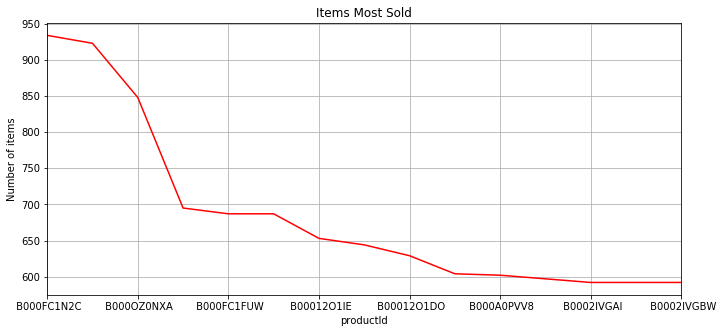

In [61]:
#Items Most sold Line graph
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
plt.grid(True)
color = 'red','green','blue','black','pink','orange','yellow'
popular_product.nlargest(15).plot(kind='line',color=color, grid = True)
plt.title('Items Most Sold')
plt.ylabel('Number of items')

Text(0, 0.5, 'Product ID')

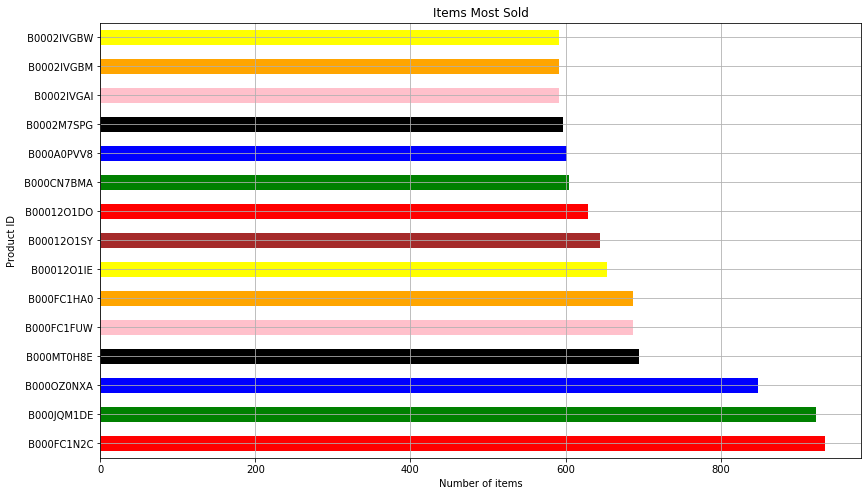

In [7]:
plt.figure(figsize=(30,8))
plt.subplot(1,2,1)
plt.grid(True)
color = 'red','green','blue','black','pink','orange','yellow','brown'
popular_product.nlargest(15).plot(kind='barh',color=color, grid = True)
plt.title('Items Most Sold')
plt.xlabel('Number of items')
plt.ylabel('Product ID')


# Most Popular Customers

In [17]:
popular_customer = main.groupby('userId')['productId'].count()
popular_customer.nlargest(10)

userId
 AV9NKOINQONGN     1104
 ANDNAFTUKW3D9      708
 A18WDI1W0XJLNL     618
 A1NWLSBO3XE74A     593
 AAXDBRTR04J35      593
 A2KV4LCZMPSIMO     579
 A8QAOMRX0JLXJ      573
 A37LKHEF0ZPVSA     564
 A3RTT2QP2V25QW     563
 A1X553B80L6SD6     560
Name: productId, dtype: int64

In [19]:
popular_customer1 = main.groupby('profileName')['productId'].count()
popular_customer1.nlargest(10)

profileName
 David                           1181
 N. Song "eclectic eccentric"    1104
 Melissa                          826
 Mike                             755
 Mike "Mike"                      725
 Rod                              704
 Denise                           690
 Mary                             669
 Diego                            645
 Ricardo                          642
Name: productId, dtype: int64

Text(0, 0.5, 'Customer Name')

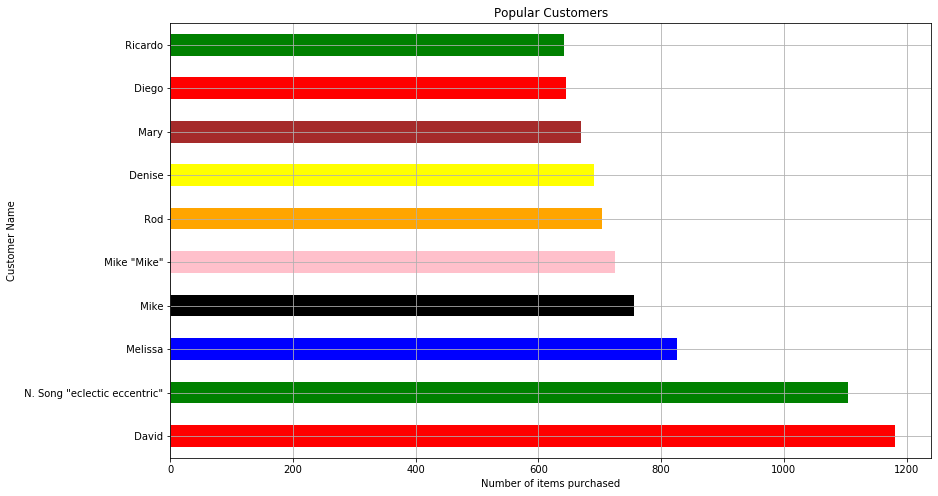

In [21]:
plt.figure(figsize=(30,8))
plt.subplot(1,2,1)
plt.grid(True)
color = 'red','green','blue','black','pink','orange','yellow','brown'
popular_customer1.nlargest(10).plot(kind='barh',color=color, grid = True)
plt.title('Popular Customers')
plt.xlabel('Number of items purchased')
plt.ylabel('Customer Name')

# Recency 

In [37]:
recent_product = main.groupby('userId')['productId'].count()

In [46]:
title = pd.merge(recent_product, main, how='right', on=['userId'])
title['Most_active'] = title['productId_x']
title['productId'] = title['productId_y']
title = title[['productId','userId','profileName', 'title','Class','purchasedate']]
title.groupby('userId').head()
#title.nlargest(10, ['Most_Sold'])

,productId,userId,profileName,title,Class,purchasedate
0,B0008D6TDQ,A0004478EF5NFPHLGCWG,STEPHANIE FIELDS,Silver Edible Glitter,Gourmet_Foods,2013-01-17
1,B0001XXB3E,A0004478EF5NFPHLGCWG,STEPHANIE FIELDS,Wilton - Sugar Sprinkles 8 Ounces,Gourmet_Foods,2013-01-17
2,B0006GK6W0,A0009060FA8P413511WS,Dallin,Rear View Sunglasses,Clothing_&_Accessories,2013-01-03
3,B00006IF79,A001114613O3F18Q5NVR6,LarryRun,"Scotch Desk Tape Dispenser, 1in. Core, Black",Office_Products,2012-11-07
4,B0002OP81A,A00166643JDONYF4HV38R,Lee,Franklin HW-1216 Children's Speller and Dicti...,Office_Products,2013-01-25
5,B000NY133G,A00197283RVF02TJX3UUN,Mary-Mina,The Secret,Kindle_Store,2012-10-30
6,B000GB1R7S,A00219682P7VSC0F8HLCU,Benjamin G.,Casio Men's CA53W Databank Calculator Watch,Watches,2012-12-27
7,B000J0C9SM,A002211213O7OZD4NB6T4,S.,"Prang Ready-to-Use Tempera Paint, 16-Oz., 12-...",Arts,2012-12-28
8,B000GCFX36,A002425836BHXOS8UX1U7,Clodagh,Rachel's Holiday (Walsh Family),Kindle_Store,2013-02-12
9,B000LKX682,A00441283R382D05H2W5G,Ian Marshall Manning,Great Eastern Sun Haiku Organic Japanese Teas...,Gourmet_Foods,2012-12-21


In [16]:
#Sorting according to the latest purchases
main.sort_values(by='purchasedate',ascending=False).head(69)

,productId,title,profileName,score,userId,purchasedate,Class
4626,B000BQ7HUE,"Singer Sew Essentials Storage System, 165 Pieces","J. Riley ""Myztree""",4.0,A3LNKY5U3QRWL0,2013-03-04,Arts
488874,B0006HXMCA,"Fellowes Wire Step File Organizer, 8 Tier, Bl...",mzcellaneous,4.0,A1ZT6NKONEB6L2,2013-03-03,Office_Products
291339,B000BWKWH8,Amazon.com,Heavenlyhog,1.0,A1JCFWKUZ9RMM7,2013-03-03,Clothing_&_Accessories
449634,B000FC2NI0,Tess of the d'Urbervilles,Kris,2.0,A1J0CB2ZMZK13O,2013-03-03,Kindle_Store
472353,B000FC1N2C,"Pride and Prejudice, Annotated (Enriched Clas...",Joy Hilda Handley,5.0,A2GDT5QQSFZD14,2013-03-03,Kindle_Store
449165,B000FC1R6O,Great Expectations (Enriched Classics),John Romero,5.0,A1584OSWVF80GN,2013-03-03,Kindle_Store
473019,B000FC1N2W,Wuthering Heights (Enriched Classics),Veronica Thompson,5.0,A3AC180CW08E3N,2013-03-03,Kindle_Store
476083,B000FCKH8I,mental floss presents Instant Knowledge (Coll...,the roche shop,5.0,AJ7LYO83JOI52,2013-03-03,Kindle_Store
203359,B000AIJAH6,Amazon.com,barry van dusen,5.0,A25VQIFBZQK1QE,2013-03-03,Clothing_&_Accessories
473021,B000FC1N2W,Wuthering Heights (Enriched Classics),"Teresa Spurlock ""prplgrl""",5.0,A035042126FPCW9EUHU1U,2013-03-03,Kindle_Store


# Consumables/Replenishment

In [4]:
consumables = pd.read_csv('Office_Products_Full2011.csv')
consumables2 = pd.read_csv('Gourmet_Foods_Full2011.csv')

In [5]:
con = pd.concat([consumables,consumables2], axis=0)
con.tail(3)

,price,productId,title,review,profileName,score,summary,text,userId,purchasedate,Class
68544,32.97,B000E433FG,"Nueva Cocina Rice Mix for Chicken, 8-Ounce Un...",0/0,"M. Charris ""marchar international""",5.0,"good product, would recommend to a friend",nice pleasant taste. it is nice to find a ric...,AGN3DEM61TN1B,2012-04-30,Gourmet_Foods
68545,32.97,B000E433FG,"Nueva Cocina Rice Mix for Chicken, 8-Ounce Un...",0/0,"K. McGee ""KayJay""",5.0,Can Be Made so Its Diabetic Friendly!,"If you are a type 2 diabetic, then you've pro...",A19SDJ2TSSL8HI,2012-04-02,Gourmet_Foods
68546,32.97,B000E433FG,"Nueva Cocina Rice Mix for Chicken, 8-Ounce Un...",0/0,Spa Queen,5.0,Great meal!,A simple to prepare meal that is delicious! Y...,A2MX99K0KOEJTB,2012-01-11,Gourmet_Foods


In [8]:
main[main['userId'].str.contains("AZYJE40XW6MFG")]


,productId,title,profileName,score,userId,purchasedate,Class
21049,B000I3XIFI,Cables To Go 12-Foot/3.5-mm Male to 2 RCA Typ...,"Alan Manning ""Gamairidium""",5.0,AZYJE40XW6MFG,2011-03-06,Cell_Phones_&_Accessories
476659,B0006HVPTW,X-Acto Deluxe Heavy-Duty Electric Pencil Shar...,"Alan Manning ""Gamairidium""",5.0,AZYJE40XW6MFG,2012-03-22,Office_Products
497734,B000DZAT12,Stanley Bostitch EPS12HC SuperPro 6 Commercia...,"Alan Manning ""Gamairidium""",5.0,AZYJE40XW6MFG,2011-09-22,Office_Products


In [ ]:
popular_product = main.groupby('productId')['userId'].count()
popular_product_title = main.groupby('title')['userId'].count()

In [32]:
#Popular in category
x = con.groupby(['Class','productId'])['productId'].agg(['count']).nlargest(20,'count')

In [33]:
print(x)

                             count
Class           productId         
Gourmet_Foods    B000CN7BMA    604
                 B000GG0BN4    530
                 B000PDY3HI    515
                 B000LL0R8I    375
                 B000GAT6NG    309
Office_Products  B00005NT9E    308
                 B000OOYECC    292
                 B00006HTZ0    291
Gourmet_Foods    B000H7LVKY    265
Office_Products  B00001N2QU    257
                 B000HVVSDU    255
Gourmet_Foods    B000NMJWZO    253
Office_Products  B0001EMM0G    247
                 B00069DKYI    245
Gourmet_Foods    B000HLAJV2    239
                 B00014EAJW    235
                 B000JRP2XO    233
Office_Products  B000KKMO90    228
Gourmet_Foods    B0009F3POY    216
Office_Products  B000J07BRQ    216
